In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch_date = epoch.create_epoch_date

model = XGBRegressor(tree_method='hist')
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
X = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayX_train_30_30_30_7_days_pred_7_days_2020.txt", delimiter=",")
Y = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayY_train_30_30_30_7_days_pred_7_days_2020.txt", delimiter=",")

In [5]:
temp_30 = X[:, :30]
temp_7 = X[:, 90:]
X = np.concatenate((temp_30, temp_7),axis = 1)

In [6]:
# Giữ lại một số sku để test
sku_test = 103
sku_train = round(X.shape[0]/329.0 - sku_test)

In [7]:

day_temp = 329

In [8]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = X[:sku_train*day_temp], X[sku_train*day_temp:], Y[:sku_train*day_temp], Y[sku_train*day_temp:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(263200, 37)
(33887, 37)
(263200, 7)
(33887, 7)


In [9]:
y_train.shape

(263200, 7)

In [10]:
model.fit(X_train, y_train)
# print(model)
# model.load_model('/home/it/Desktop/NTMINH/Data/Data/data_train/model_train_30_30_30_7_days_pred_7_days_2020')

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [11]:
# make predictions for test data
y_pred = model.predict(X_test)

In [12]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

9.253636326722264

In [13]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [14]:

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 113675
Số lượng lable == 0 123534
Số lượng pred > 0 100486
Số lượng pred == 0 136723
Số lượng pred == 0 0


In [15]:
# Tỉ lệ khi label = 0 và dự đoán đoán đúng

total = len(y_test[y_test == 0])
acc = np.sum((y_test == 0) & (y_pred_int == 0))
acc/total

0.8176453446014862

In [16]:
# Tỉ lệ đoán khác 0 khi dữ liệu thật khác 0

total = len(y_test[y_test != 0])
acc = ((y_test != 0) & (y_pred_int != 0)).sum()
acc/total

0.6858060259511766

In [17]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

6.319054721439672

In [18]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

225.18188387155533
-134.79644775390625


<AxesSubplot:>

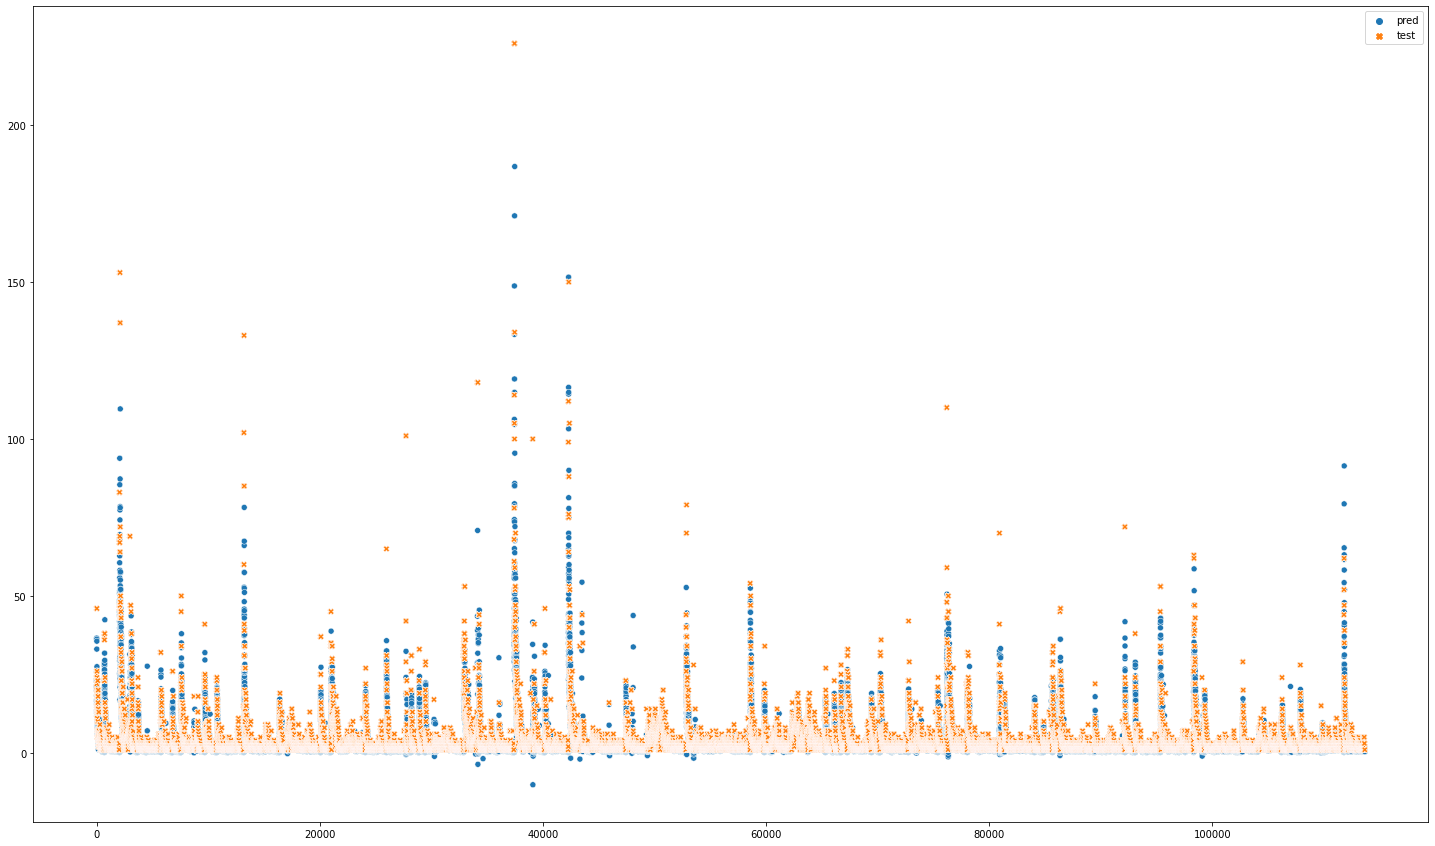

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({ 'pred': y_pred[condition],
                    'test':  y_test[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [20]:
X_test.shape[0]/103

329.0

In [21]:
round(np.random.rand()*100)

11

In [22]:
num = round(np.random.rand()*100)


temp = X_test[day_temp*num + 50:60 + day_temp*num, :17].copy()
print(temp)

temp = y_test[day_temp*num + 50:60 + day_temp*num].copy()
print(temp)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


<AxesSubplot:>

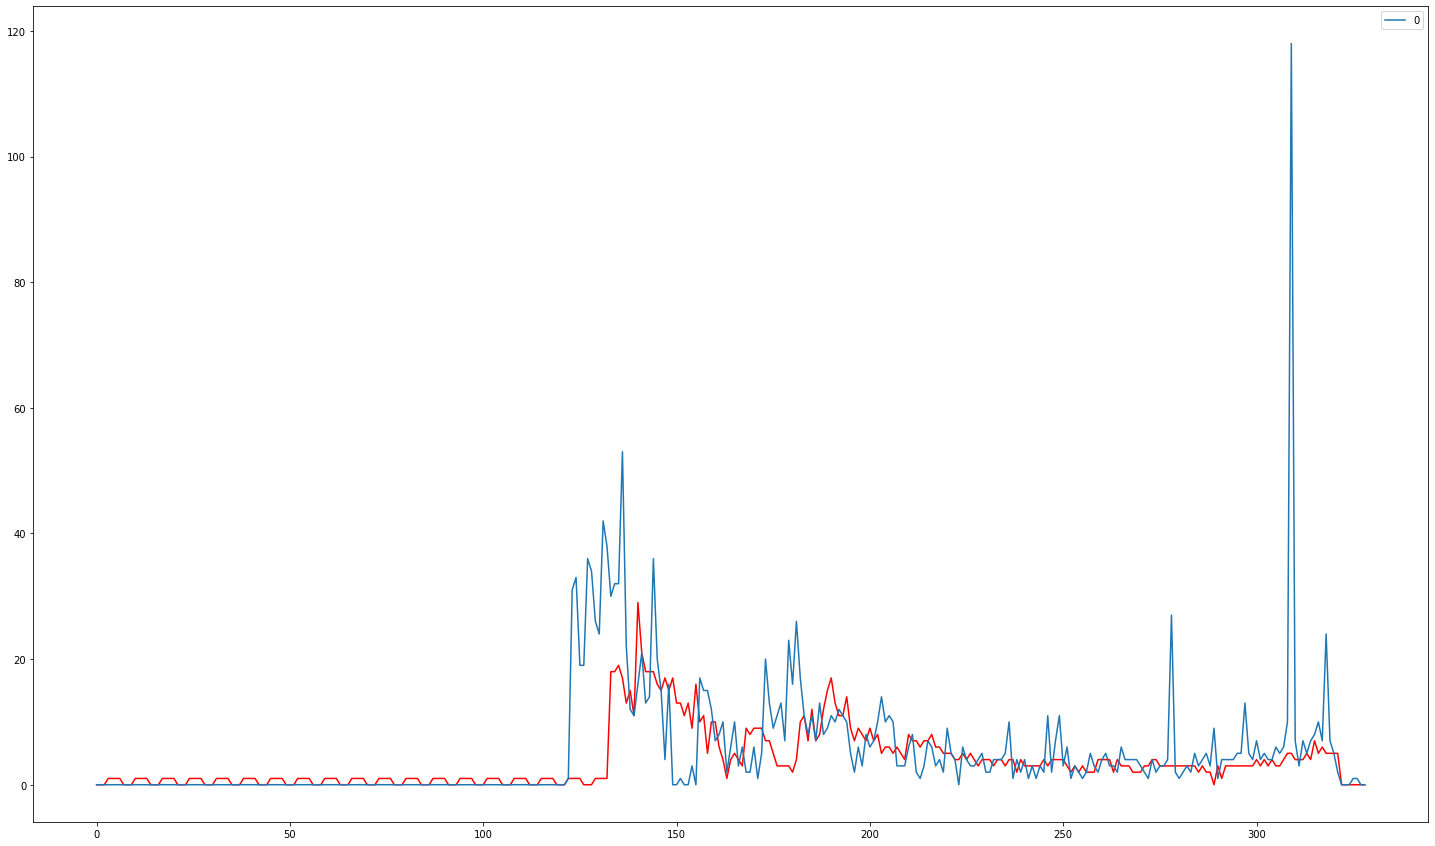

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'test':  np.random.rand(5)})
df2 = pd.DataFrame({'test':  np.random.rand(5)})

num = round(np.random.rand()*100)

temp = X_test[day_temp*num:day_temp + day_temp*num].copy()
result = y_test[day_temp*num:day_temp + day_temp*num, 6:7].copy()
temp.shape

fig, ax = plt.subplots(figsize = (25, 15))

array = np.zeros(shape = (day_temp, day_temp))
array[:] = np.nan

for i in range(0, day_temp - 7, 7):
          predict = model.predict([temp[i]])

          array[i, i:i+7] = np.round(predict)

array = np.nan_to_num(array)

array = np.sum(array, axis = 0)
sns.lineplot(data = array, ax = ax, color = 'red')

# for row in range(array.shape[0]):
#           sns.lineplot(data = array[row], ax = ax)

sns.lineplot(data = result, ax = ax)

<AxesSubplot:>

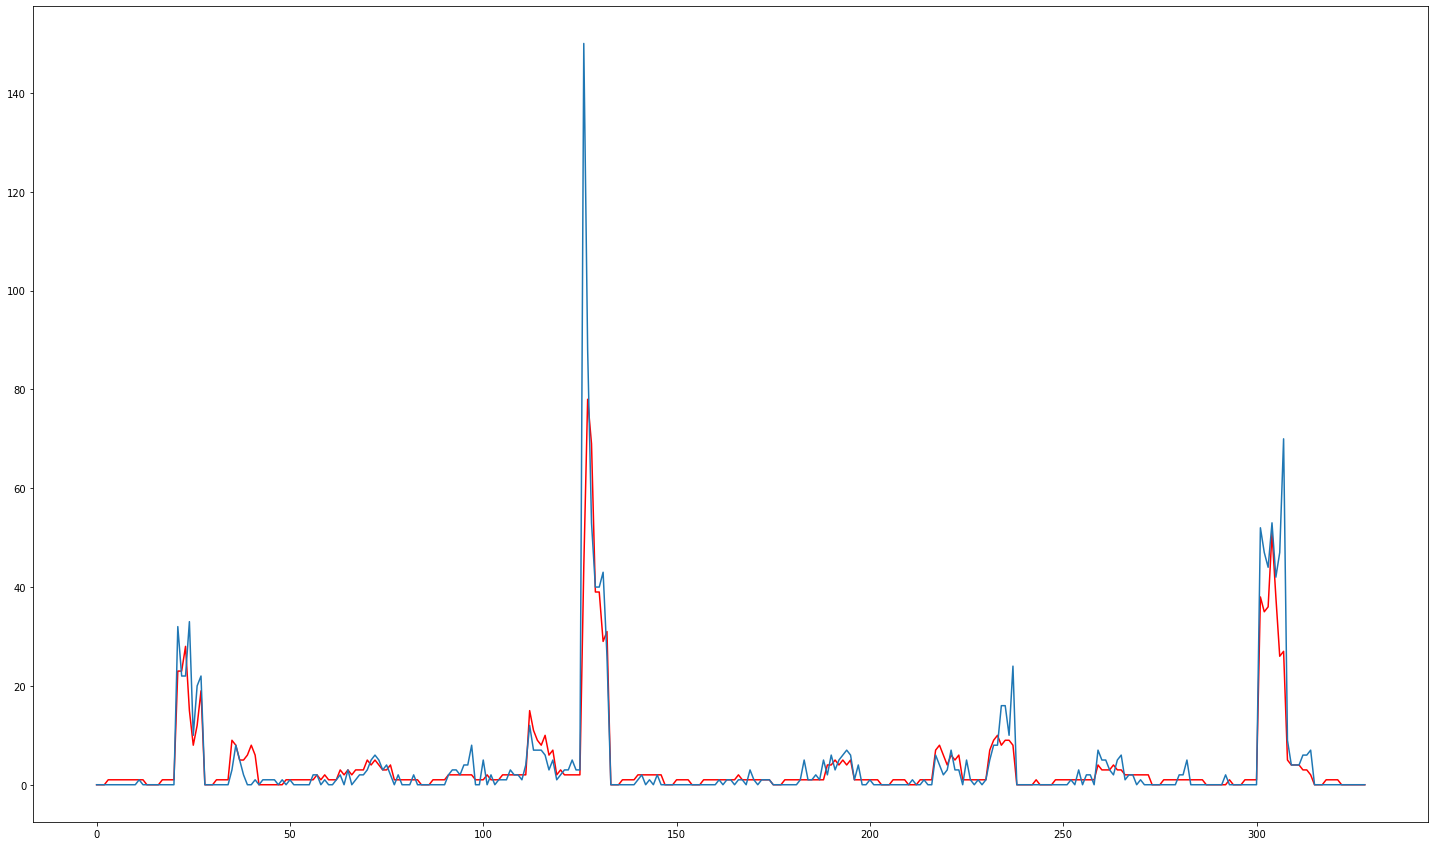

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'test':  np.random.rand(5)})
df2 = pd.DataFrame({'test':  np.random.rand(5)})

num = round(np.random.rand()*100)

# temp = X_test[day_temp*num:day_temp + day_temp*num].copy()
# result = y_test[day_temp*num:day_temp + day_temp*num, 6:7].copy()

fig, ax = plt.subplots(figsize = (25, 15))

array = np.zeros(shape = (day_temp, day_temp))
result = np.zeros(shape = (day_temp, day_temp))
array[:] = np.nan
result[:] = np.nan

for i in range(0, day_temp - 7, 7):
          num = round(np.random.rand()*33887)
          temp = X_test[num].copy()
          predict = model.predict([temp])

          array[i, i:i+7] = np.round(predict)
          result[i, i:i+7] = y_test[num]

array = np.nan_to_num(array)
array = np.sum(array, axis = 0)

result = np.nan_to_num(result)
result = np.sum(result, axis = 0)

sns.lineplot(data = array, ax = ax, color = 'red')

# for row in range(array.shape[0]):
#           sns.lineplot(data = array[row], ax = ax)

sns.lineplot(data = result, ax = ax)

In [25]:
# Sử dụng độ đo MSE trên mỗi ngày
# make predictions for test data
y_pred = model.predict(X_test)

error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))))/(y_pred.shape[0]*y_pred.shape[1])
print('Lỗi trên mỗi ngày: ',error_per_day)

Lỗi trên mỗi ngày:  1.321948046674609


In [26]:
# Sử dụng độ đo MSE trên mỗi tuần
# make predictions for test data
y_pred = model.predict(X_test)


error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))))/(y_pred.shape[0])
print('Lỗi trên mỗi tuần: ',error_per_day)

Lỗi trên mỗi tuần:  9.253636326722264


In [27]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

# phần trăm dự đoán đúng những ngày không bán
total = np.sum(y_test == 0)

right = np.sum((y_test == 0) & (y_pred_int == 0))

print('Phần trăm dự đoán đúng những ngày không bán:', right/total)

Phần trăm dự đoán đúng những ngày không bán: 0.8176453446014862


In [28]:
y_test_0 = y_test[y_test == 0]
y_pred_of_test_0 = y_pred[y_test == 0]

error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_of_test_0, y_test_0))))/(y_pred.shape[0])
print('Lỗi trên mỗi tuần: ',error_per_day)

error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_of_test_0, y_test_0))))/(y_pred.shape[0]*y_pred.shape[1])
print('Lỗi trên mỗi ngày: ',error_per_day)

Lỗi trên mỗi tuần:  2.934581605282591
Lỗi trên mỗi ngày:  0.4192259436117987


In [29]:
print(np.sum(np.subtract(y_pred_of_test_0, y_test_0) > 70))
print(np.sum(np.subtract(y_pred_of_test_0, y_test_0) > 60))
print(np.sum(np.subtract(y_pred_of_test_0, y_test_0) > 50))
print(np.sum(np.subtract(y_pred_of_test_0, y_test_0) > 40))
print(np.sum(np.subtract(y_pred_of_test_0, y_test_0) > 30))

0
0
4
6
17


In [30]:
# phần trăm dự đoán đúng những ngày có bán
total = np.sum(y_test != 0)

right = np.sum((y_test != 0) & (y_pred_int != 0))

print('Phần trăm dự đoán đúng những ngày có bán:', right/total)

Phần trăm dự đoán đúng những ngày có bán: 0.6858060259511766


In [31]:
y_test_not0 = y_test[y_test != 0]
y_pred_of_test_not0 = y_pred[y_test != 0]

error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_of_test_not0, y_test_not0))))/(y_pred.shape[0])
print('Lỗi trên mỗi tuần: ',error_per_day)

error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_of_test_not0, y_test_not0))))/(y_pred.shape[0]*y_pred.shape[1])
print('Lỗi trên mỗi ngày: ',error_per_day)

Lỗi trên mỗi tuần:  6.319054721439672
Lỗi trên mỗi ngày:  0.9027221030628103


In [32]:
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 100))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 90))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 80))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 70))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 60))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 50))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 40))
print(np.sum(np.abs(np.subtract(y_pred_of_test_not0, y_test_not0)) > 30))

50
67
88
125
191
232
361
529


In [33]:
def behon(a1, a2, threshold):
          a = np.subtract(a1, a2)
          b = np.abs(a[a < 0]) > threshold
          return b.sum()

def lonhon(a1, a2, threshold):
          a = np.subtract(a1, a2)
          b = np.abs(a[a > 0]) > threshold
          return b.sum()

In [34]:
print(behon(y_pred_of_test_not0, y_test_not0,100))
print(behon(y_pred_of_test_not0, y_test_not0,90))
print(behon(y_pred_of_test_not0, y_test_not0,80))
print(behon(y_pred_of_test_not0, y_test_not0,70))
print(behon(y_pred_of_test_not0, y_test_not0,60))
print(behon(y_pred_of_test_not0, y_test_not0,50))
print(behon(y_pred_of_test_not0, y_test_not0,40))
print(behon(y_pred_of_test_not0, y_test_not0,30))

49
66
87
122
188
228
352
503


In [35]:
print(lonhon(y_pred_of_test_not0, y_test_not0,100))
print(lonhon(y_pred_of_test_not0, y_test_not0,90))
print(lonhon(y_pred_of_test_not0, y_test_not0,80))
print(lonhon(y_pred_of_test_not0, y_test_not0,70))
print(lonhon(y_pred_of_test_not0, y_test_not0,60))
print(lonhon(y_pred_of_test_not0, y_test_not0,50))
print(lonhon(y_pred_of_test_not0, y_test_not0,40))
print(lonhon(y_pred_of_test_not0, y_test_not0,30))

1
1
1
3
3
4
9
26


In [36]:
def tracking_signal(y_test, y_pred):
          temp1 = np.multiply(np.sum(np.subtract(y_test, y_pred), axis=1), 7)
          temp2 = np.sum(np.abs(np.subtract(y_test, y_pred)), axis = 1)

          result = np.divide(temp1, temp2)
          return result
          pass

sum_int_pred = np.sum(y_pred_int, axis = 1)
sum_int_test = np.sum(y_test, axis = 1)
sum_int_error = np.sum(np.sqrt(np.square(np.subtract(y_pred_int, y_test))), axis = 1)
sum_error = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))), axis = 1)
sum_int_error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_int, y_test))), axis = 1)/7
sum_error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))), axis = 1)/7
sum_error_boolean = np.sum(y_test == y_pred_int, axis = 1)/7
sum_error_sum  = np.abs(np.subtract(sum_int_pred, sum_int_test))
sum_error_tracking_signal = tracking_signal(y_test, y_pred)

In [37]:
# Xác định tăng giảm của đơn hàng trong ngày
y_test_6_day = y_test[:, :6].copy()
x_test_1_day = X_test[:, 29:30].copy()
pre_7_day = np.concatenate((x_test_1_day, y_test_6_day), axis = 1)
pre_7_day.shape

is_higher = y_test >= pre_7_day
is_higher_predict = y_pred_int >= pre_7_day
is_lower = y_test <= pre_7_day
is_lower_predict = y_pred_int <= pre_7_day


sum_acc_higher, soluonghigher = np.sum(is_higher_predict & is_higher, axis = 1), np.sum(is_higher, axis = 1)
sum_acc_lower, soluonglower = np.sum(is_lower_predict & is_lower, axis = 1), np.sum(is_lower, axis = 1)


# Dự đoán bán và không bán
def khongban(a, b):
          temp1 = a == 0
          temp2 = b == 0

          return np.sum(temp1 & temp2, axis = 1), np.sum(temp1, axis = 1)


def coban(a, b):
          temp1 = (a != 0)
          temp2 = (b != 0)

          return np.sum(temp1 & temp2, axis = 1), np.sum(temp1, axis = 1)

doandungkhongban, soluogkhongban = khongban(y_test, y_pred_int)
doandungcoban, soluogcoban = coban(y_test, y_pred_int)


In [51]:
threshold = 30
condition = sum_int_test < threshold
print(f'Có {len(sum_int_test[condition])} sản phẩm thỏa điều kiện < {threshold}')
print(f'Độ lỗi sum_int_error trung bình ở {threshold} là:',sum_int_error[condition].mean())
print(f'Độ lỗi sum_error trung bình ở {threshold} là:',sum_error[condition].mean())
print(f'Độ lỗi sum_int_error_per_day trung bình ở {threshold} là:',sum_int_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_per_day trung bình ở {threshold} là:',sum_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_tracking_signal trung bình ở {threshold} là:',sum_error_tracking_signal[condition].mean())
# print(f'Độ lỗi sum_error_boolean trung bình ở {threshold} là:',sum_error_boolean[condition].mean())
print(f'Độ lỗi sum_error_sum trung bình ở {threshold} là:',sum_error_sum[condition].mean())
print(f'Độ lỗi sum_acc_higher trung bình ở {threshold} là:',sum_acc_higher[condition].sum()/soluonghigher[condition].sum())
print(f'Độ lỗi sum_acc_lower trung bình ở {threshold} là:',sum_acc_lower[condition].sum()/soluonglower[condition].sum())
print(f'Đoán đúng không bán trung bình ở {threshold} là:',doandungkhongban[condition].sum()/soluogkhongban[condition].sum())
print(f'Đoán đúng có bán trung bình ở {threshold} là:',doandungcoban[condition].sum()/soluogcoban[condition].sum())

Có 30774 sản phẩm thỏa điều kiện < 30
Độ lỗi sum_int_error trung bình ở 30 là: 4.911776174692923
Độ lỗi sum_error trung bình ở 30 là: 6.297202838920839
Độ lỗi sum_int_error_per_day trung bình ở 30 là: 0.7016823106704175
Độ lỗi sum_error_per_day trung bình ở 30 là: 0.89960040556012
Độ lỗi sum_error_tracking_signal trung bình ở 30 là: -2.671968934546101
Độ lỗi sum_error_sum trung bình ở 30 là: 3.4849873269643203
Độ lỗi sum_acc_higher trung bình ở 30 là: 0.87424889818024
Độ lỗi sum_acc_lower trung bình ở 30 là: 0.9275769745649264
Đoán đúng không bán trung bình ở 30 là: 0.8188170945752888
Đoán đúng có bán trung bình ở 30 là: 0.6301131043982652


In [39]:
threshold = 0
condition = sum_int_test >= threshold
print(f'Có {len(sum_int_test[condition])} sản phẩm thỏa điều kiện >= {threshold}')
print(f'Độ lỗi sum_int_error trung bình ở {threshold} là:',sum_int_error[condition].mean())
print(f'Độ lỗi sum_error trung bình ở {threshold} là:',sum_error[condition].mean())
print(f'Độ lỗi sum_int_error_per_day trung bình ở {threshold} là:',sum_int_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_per_day trung bình ở {threshold} là:',sum_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_tracking_signal trung bình ở {threshold} là:',sum_error_tracking_signal[condition].mean())
# print(f'Độ lỗi sum_error_boolean trung bình ở {threshold} là:',sum_error_boolean[condition].mean())
print(f'Độ lỗi sum_error_sum trung bình ở {threshold} là:',sum_error_sum[condition].mean())
print(f'Độ lỗi sum_acc_higher trung bình ở {threshold} là:',sum_acc_higher[condition].sum()/soluonghigher.sum())
print(f'Độ lỗi sum_acc_lower trung bình ở {threshold} là:',sum_acc_lower[condition].sum()/soluonglower.sum())
print(f'Đoán đúng không bán trung bình ở {threshold} là:',doandungkhongban[condition].sum()/soluogkhongban.sum())
print(f'Đoán đúng có bán trung bình ở {threshold} là:',doandungcoban[condition].sum()/soluogcoban.sum())

# Với những ngày bán lớn hơn một lượng hàng thì chênh lệch là bao nhiêu
# Làm một độ đo xem là nhựng cực trí cực đại cực tiểu trong khỏang 3 ngày của predict có trùng với test hay không.


Có 33887 sản phẩm thỏa điều kiện >= 0
Độ lỗi sum_int_error trung bình ở 0 là: 8.056776935107859
Độ lỗi sum_error trung bình ở 0 là: 9.253636326722264
Độ lỗi sum_int_error_per_day trung bình ở 0 là: 1.150968133586837
Độ lỗi sum_error_per_day trung bình ở 0 là: 1.321948046674609
Độ lỗi sum_error_tracking_signal trung bình ở 0 là: -2.226603717009503
Độ lỗi sum_error_sum trung bình ở 0 là: 5.944285419187299
Độ lỗi sum_acc_higher trung bình ở 0 là: 0.8565098782939512
Độ lỗi sum_acc_lower trung bình ở 0 là: 0.9210058836840914
Đoán đúng không bán trung bình ở 0 là: 0.8176453446014862
Đoán đúng có bán trung bình ở 0 là: 0.6858060259511766


In [55]:
def find_max_min_local(series, threshold = 20):
        """
            Input: 
                series: list
            Return:
                list of index
        """
        result = []
        for i in range(1, len(series) - 1):
            if series[i] > series[i - 1] and series[i] > series[i + 1]:
                temp = series[i]*2 - series[i - 1] - series[i + 1]
                if temp > threshold:
                    result.append(i)
            # elif series[i] < series[i - 1] and series[i] < series[i + 1]: 
            #     temp = series[i - 1] + series[i + 1] - series[i]*2
            #     if temp > threshold:
            #         result.append(i)
        return result

def mo_rong_pham_vi(test_max):
    temp = test_max.copy()
    for index in temp:
            test_max.append(index+1)
            test_max.append(index-1)
    return test_max


total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for i in range(len(y_test)):
    test_max = find_max_min_local(y_test[i], 50)
    # Cộng số ngày cực đại vào total
    total_model = len(test_max)

    test_pred = find_max_min_local(y_pred[i], 20)
    # Mở rộng phạm vi để lấy số ngày trùng nhau giữa dự đoán và groundtruth
    test_pred = mo_rong_pham_vi(test_pred)
    total_pred = len(set(test_pred))

    # Đếm số ngày trùng nhau
    true_positive += len(np.intersect1d(test_max,test_pred))
    false_positive += total_pred - len(np.intersect1d(test_max,test_pred))
    true_negative += 0
    false_negative += total_model - len(np.intersect1d(test_max,test_pred))

print("Ngưỡng cực đại test: 50, ở pred là 20")
print('Tỉ lệ cực đại trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ cực đại trùng recall:',true_positive/(true_positive + false_negative))

Ngưỡng cực đại test: 50, ở pred là 20
Tỉ lệ cực đại trùng precision: 0.06680161943319839
Tỉ lệ cực đại trùng recall: 0.17553191489361702


In [56]:
total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for i in range(len(y_test)):
    test_max = find_max_min_local(y_test[i], 200)
    # Cộng số ngày cực đại vào total
    total_model = len(test_max)

    test_pred = find_max_min_local(y_pred[i], 100)
    # Mở rộng phạm vi để lấy số ngày trùng nhau giữa dự đoán và groundtruth
    test_pred = mo_rong_pham_vi(test_pred)
    total_pred = len(set(test_pred))

    # Đếm số ngày trùng nhau
    true_positive += len(np.intersect1d(test_max,test_pred))
    false_positive += total_pred - len(np.intersect1d(test_max,test_pred))
    true_negative += 0
    false_negative += total_model - len(np.intersect1d(test_max,test_pred))

print("Ngưỡng cực đại test: 200, ở pred là 100")
print('Tỉ lệ cực đại trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ cực đại trùng recall:',true_positive/(true_positive + false_negative))


Ngưỡng cực đại test: 200, ở pred là 100
Tỉ lệ cực đại trùng precision: 0.1111111111111111
Tỉ lệ cực đại trùng recall: 0.1


In [62]:
from scipy import stats

total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for num in range(int(len(y_test)/day_temp)):
          temp_test = y_test[day_temp*num:day_temp + day_temp*num:7].copy()
          temp_pred = y_pred[day_temp*num:day_temp + day_temp*num:7].copy()

          zscore_temp = np.abs(stats.zscore(temp_test, axis = None)) > 5
          zscore_pred = np.abs(stats.zscore(temp_pred, axis = None)) > 4

          total_model = zscore_temp.sum()
          total_pred = zscore_pred.sum()

          correct = (zscore_pred[zscore_temp == True] == True).sum()

          true_positive += correct
          false_positive += total_pred - correct
          true_negative += 0
          false_negative += total_model - correct

print("Ngưỡng cực đại test: 5, ở pred là 4 (t-distribution)")
print('Tỉ lệ đột biến trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ đột biến trùng recall:',true_positive/(true_positive + false_negative))

Ngưỡng cực đại test: 5, ở pred là 4 (t-distribution)
Tỉ lệ đột biến trùng precision: 0.20308483290488433
Tỉ lệ đột biến trùng recall: 0.40512820512820513


In [45]:
print('Tỉ lệ đột biến sai ở pred')
1 - correct/total_pred

Tỉ lệ đột biến sai ở pred


0.6051693404634582

### Model dự đoán có bán hay không

In [46]:
from xgboost import XGBClassifier

y_train_classifier = y_train > 0
y_test_classifier = y_test > 0

model_classifier = XGBClassifier(tree_method = 'hist')
model_classifier.fit(X_train, y_train_classifier)

y_pred_classifier = model_classifier.predict(X_test)


y_test_classifier = np.asarray(y_test_classifier, dtype = np.int32)
y_pred_classifier = np.asarray(y_pred_classifier, dtype = np.int32)

print('Phần trăm dự đoán tổng thể')
print(np.sum(y_test_classifier == y_pred_classifier)/(y_test_classifier.shape[0]*y_test_classifier.shape[1]))

condition = y_test_classifier == 1
total = np.sum(y_test_classifier[condition])
correct = np.sum(y_test_classifier[condition] == y_pred_classifier[condition])
print('Phần trăm dự đoán label')
print(total)
print(correct/total)

condition = y_test == 0
temp = y_test[condition]
temp[:] = 1
total = np.sum(temp)
correct = np.sum(y_test_classifier[condition] == y_pred_classifier[condition])
print('Phần trăm dự đoán label')
print(total)
print(correct/total)


Phần trăm dự đoán tổng thể
0.7736089271486326
Phần trăm dự đoán label
113675
0.7961557070595997
Phần trăm dự đoán label
123534.0
0.7528615603801383


In [47]:
from xgboost import XGBClassifier

y_train_classifier = np.zeros(shape = y_train.shape)
y_test_classifier = np.zeros(shape = y_test.shape)

for num in range(int(len(y_train)/day_temp)):
          temp_train = y_train[day_temp*num:day_temp + day_temp*num].copy()
          y_train_classifier[day_temp*num:day_temp + day_temp*num] = np.abs(stats.zscore(temp_train, axis = 0)) > 3

for num in range(int(len(y_test)/day_temp)):
          temp_test = y_test[day_temp*num:day_temp + day_temp*num].copy()
          y_test_classifier[day_temp*num:day_temp + day_temp*num] = np.abs(stats.zscore(temp_test, axis = 0)) > 2

model_classifier = XGBClassifier(tree_method = 'hist')
model_classifier.fit(X_train, y_train_classifier)

y_pred_classifier = model_classifier.predict(X_test)


y_test_classifier = np.asarray(y_test_classifier, dtype = np.int32)
y_pred_classifier = np.asarray(y_pred_classifier, dtype = np.int32)

print('Phần trăm dự đoán tổng thể')
print(np.sum(y_test_classifier == y_pred_classifier)/(y_test_classifier.shape[0]*y_test_classifier.shape[1]))

condition = y_test_classifier == 1
total = np.sum(y_test_classifier[condition])
correct = np.sum(y_test_classifier[condition] == y_pred_classifier[condition])
print('Phần trăm dự đoán label')
print(total)
print(correct/total)

condition = y_test_classifier == 0
temp = y_test[condition]
temp[:] = 1
total = np.sum(temp)
correct = np.sum(y_test_classifier[condition] == y_pred_classifier[condition])
print('Phần trăm dự đoán label')
print(total)
print(correct/total)

Phần trăm dự đoán tổng thể
0.9621768145390773
Phần trăm dự đoán label
10362
0.16251688863153832
Phần trăm dự đoán label
226847.0
0.9987039722808765


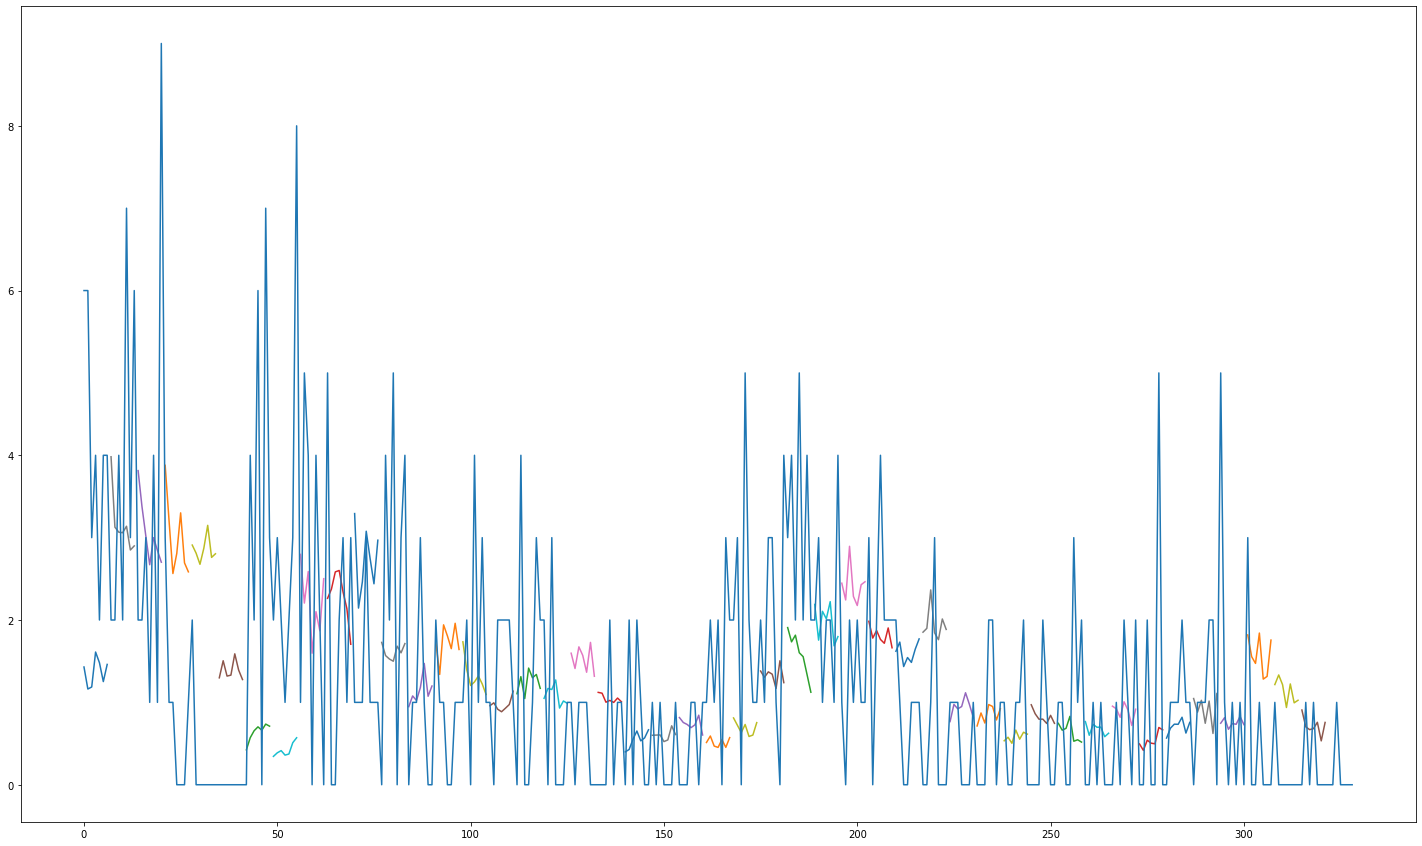

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'test':  np.random.rand(5)})
df2 = pd.DataFrame({'test':  np.random.rand(5)})


temp = X_test[day_temp*num:day_temp + day_temp*num].copy()
result = y_test[day_temp*num:day_temp + day_temp*num, 6:7].copy()
temp.shape

fig, ax = plt.subplots(figsize = (25, 15))

array = np.zeros(shape = (day_temp, day_temp))
array[:] = np.nan

for i in range(0, day_temp - 7, 7):
          predict = model.predict([temp[i]])

          array[i, i:i+7] = predict

# array = np.nan_to_num(array)

# array = np.sum(array, axis = 0)
sns.lineplot(data = array, ax = ax, color = 'red')

for row in range(array.shape[0]):
          sns.lineplot(data = array[row], ax = ax)

sns.lineplot(data = result, ax = ax)
ax.get_legend().remove()